# **Customer Churn and Feedback Sentiment Prediction**

# Load data



In [ ]:
import pandas as pd
df1=pd.read_csv('/content/Telco-Customer-Churn-dataset-cleaned.csv')
df=pd.read_csv('/content/customer_churn_sentiment_dataset.csv')

In [ ]:
df1.info()

*EDA has been completed on the given dataset. No missing values or data quality issues were identified. The dataset is clean, and we now proceed with visualization to extract meaningful insights.*

# 📈 Data Visualization for Better Insight and Understanding

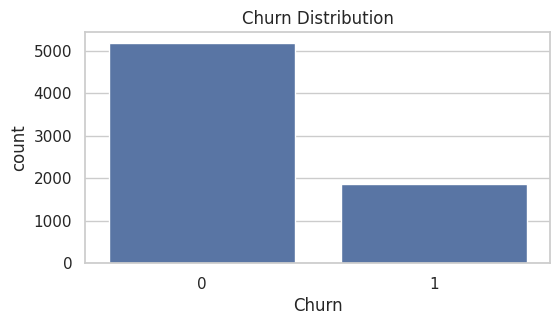

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
sns.set(style="whitegrid")
sns.countplot(x='Churn', data=df1)
plt.title('Churn Distribution')
plt.show()

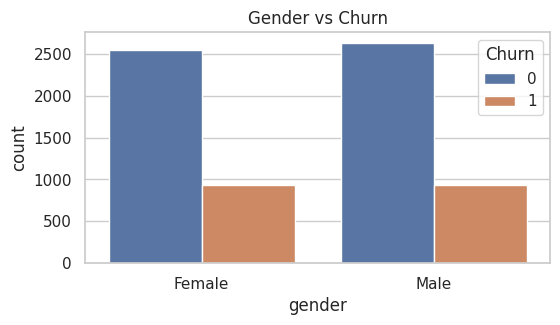

In [ ]:
plt.figure(figsize=(6, 3))
sns.countplot(x='gender', hue='Churn', data=df1)
plt.title('Gender vs Churn')
plt.show()

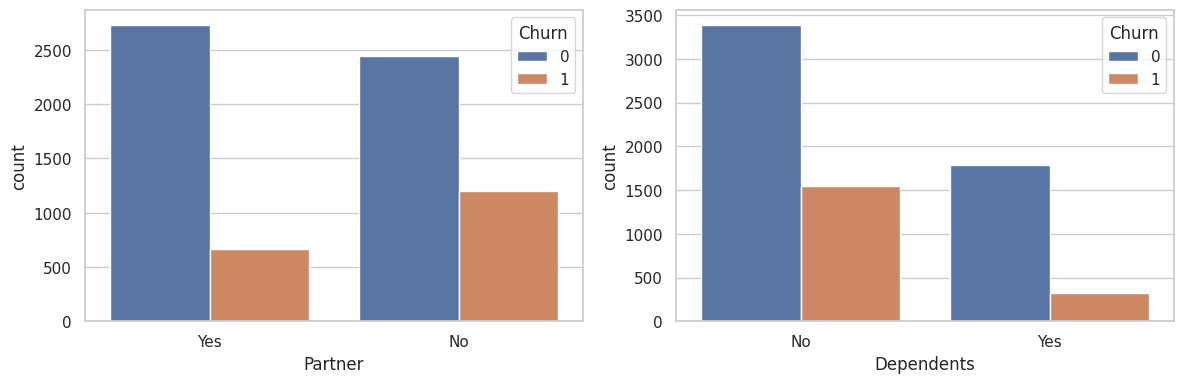

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.countplot(x='Partner', hue='Churn', data=df1, ax=ax[0])
sns.countplot(x='Dependents', hue='Churn', data=df1, ax=ax[1])

plt.tight_layout()
plt.show()

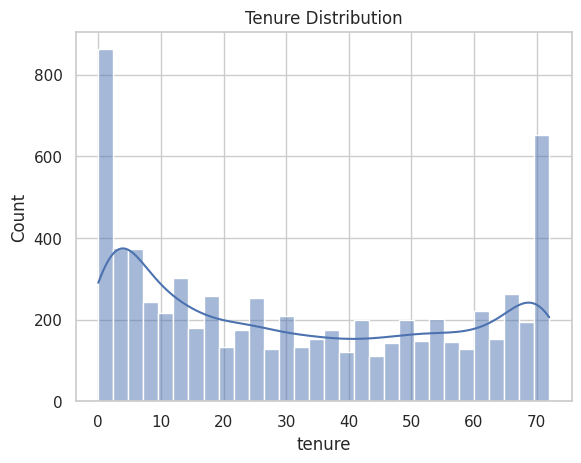

In [ ]:
sns.histplot(df1['tenure'], bins=30, kde=True)
plt.title('Tenure Distribution')
plt.show()

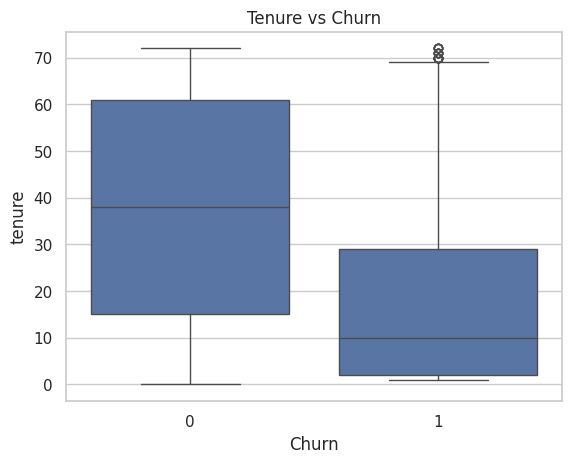

In [ ]:
sns.boxplot(x='Churn', y='tenure', data=df1)
plt.title('Tenure vs Churn')
plt.show()

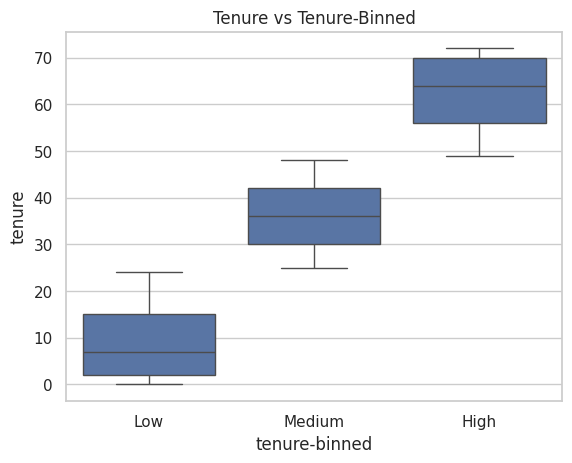

In [ ]:
#tenure vs tenure-binned
sns.boxplot(x='tenure-binned', y='tenure', data=df1)
plt.title('Tenure vs Tenure-Binned')
plt.show()

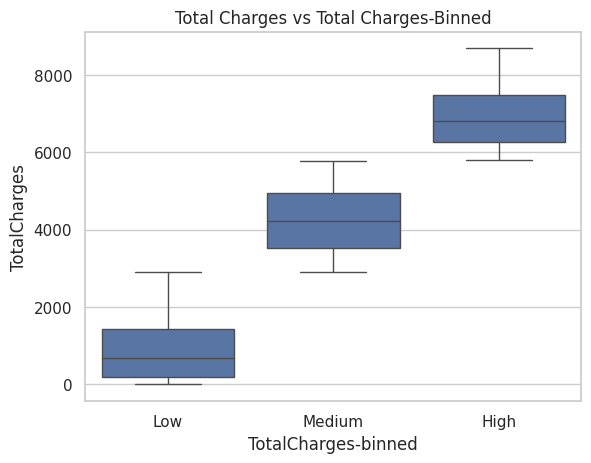

In [ ]:
#TotalCharges-binned vs TotalCharges
sns.boxplot(x='TotalCharges-binned', y='TotalCharges', data=df1)
plt.title('Total Charges vs Total Charges-Binned')
plt.show()

Text(0.5, 1.0, 'Total Charges Distribution')

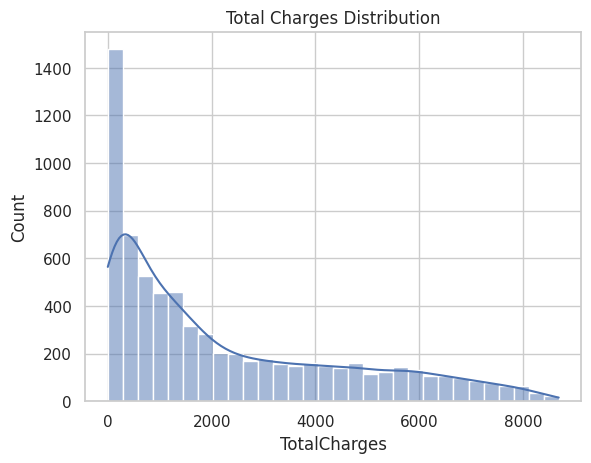

In [ ]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'], errors='coerce')
sns.histplot(df1['TotalCharges'], bins=30, kde=True)
plt.title('Total Charges Distribution')

# 📊 Feature Importance Analysis Using Correlation Matrix

*Note: Feature importance was analyzed, and features were selected based on their values. Therefore, the label encoder for the excluded features was not used in the next steps.*

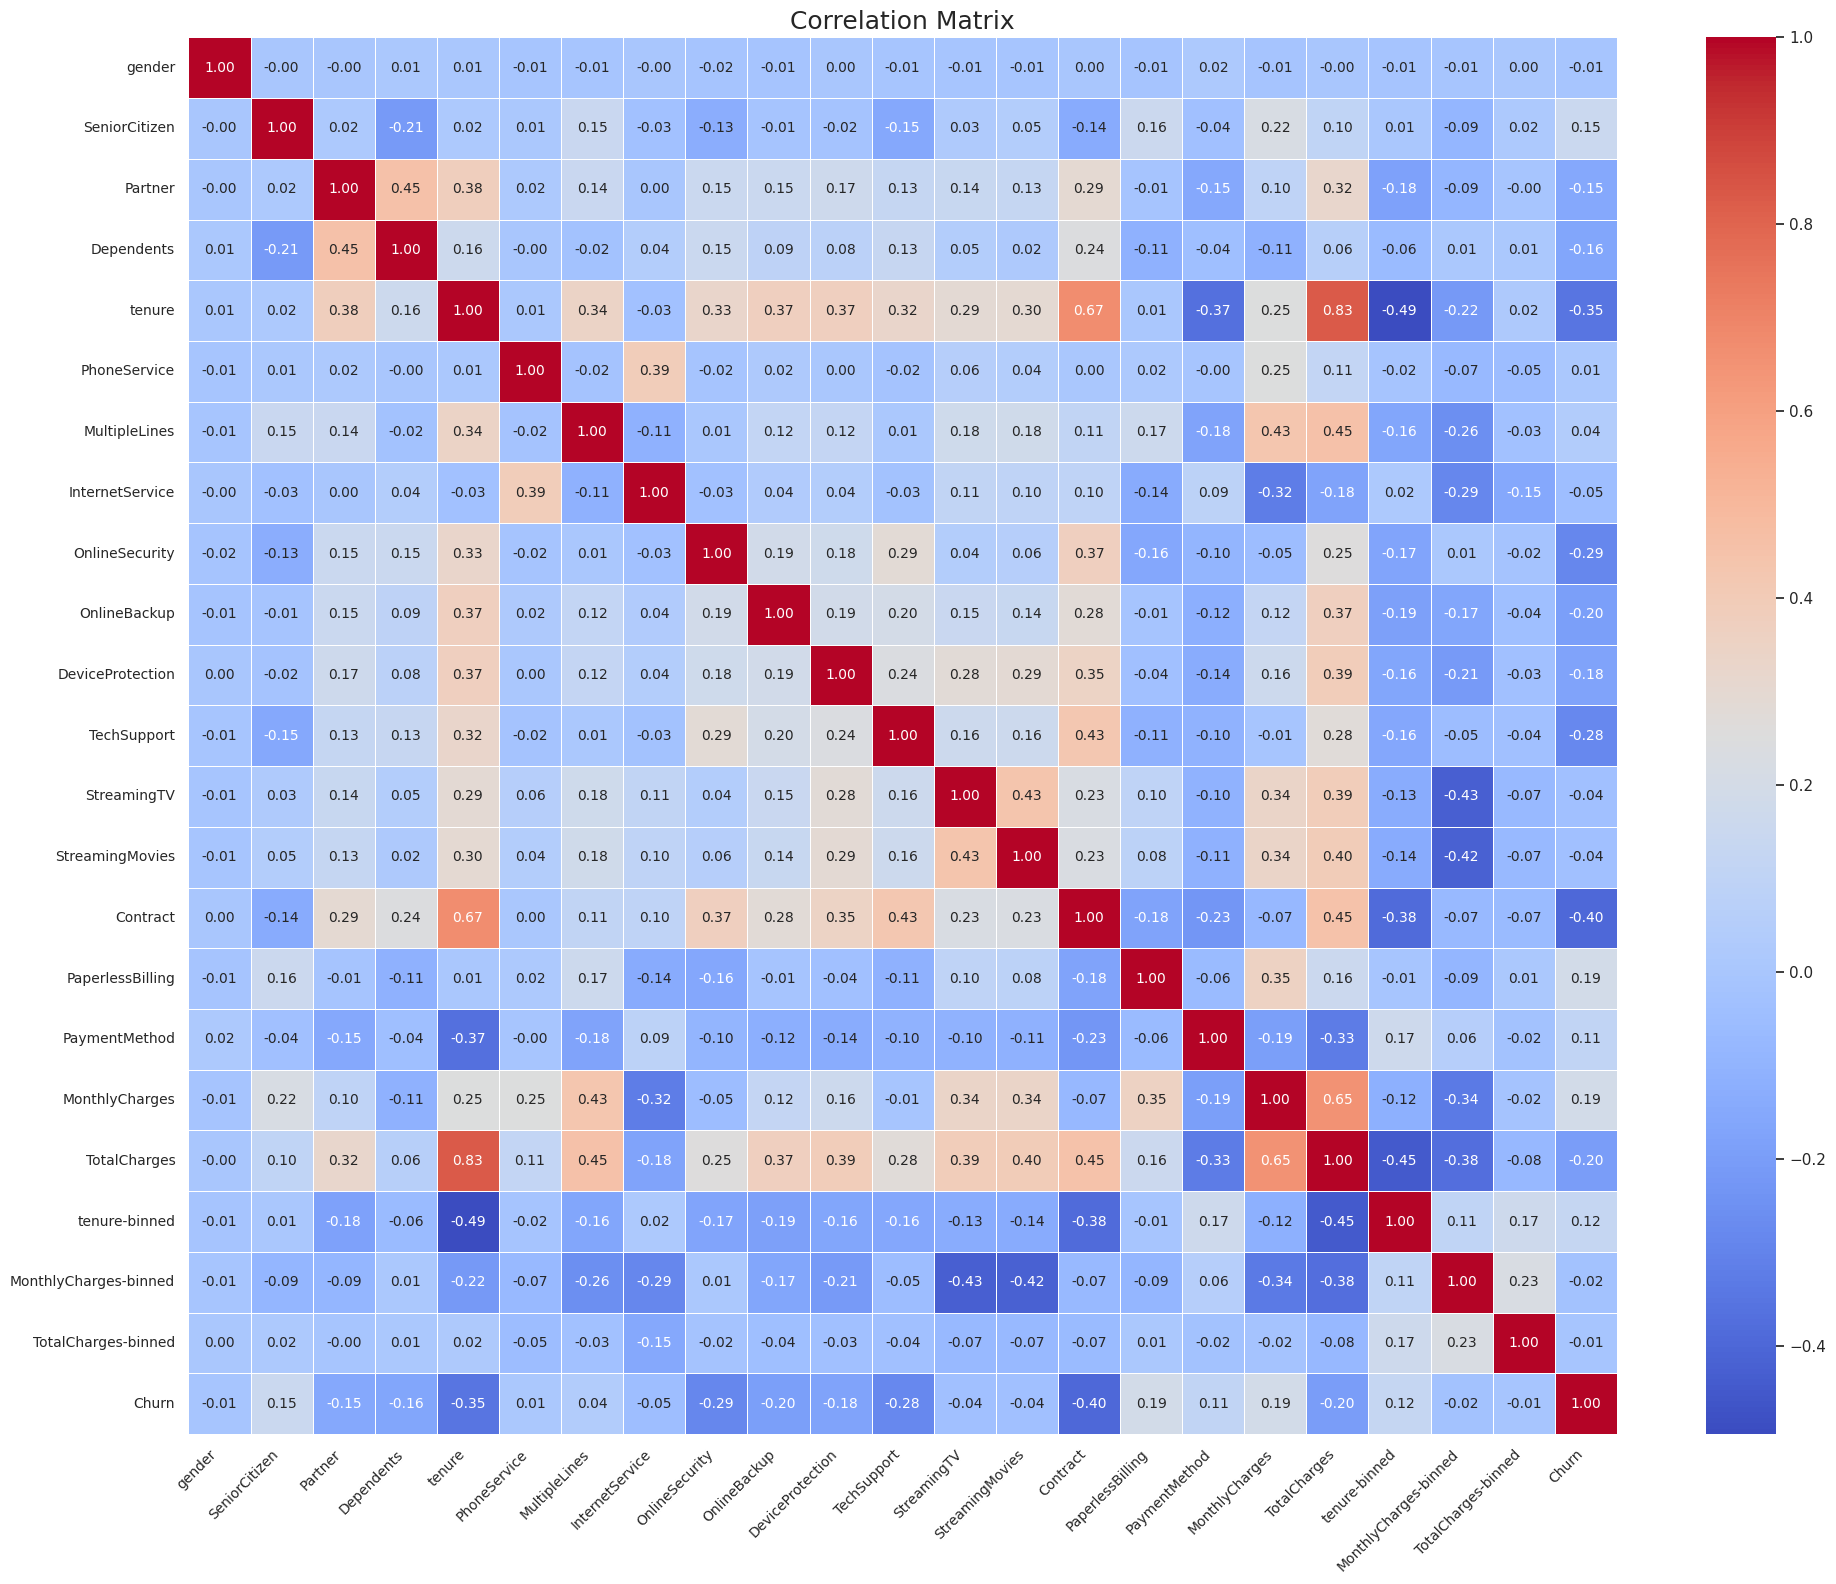

In [ ]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df1.select_dtypes(include='object').columns

le = LabelEncoder()
for col in cat_cols:
    df1[col] = le.fit_transform(df1[col])

plt.figure(figsize=(20, 16))

corr_matrix = df1.corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    annot_kws={"size": 10})

plt.title('Correlation Matrix', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# 👉 Correlation-Based Feature Selection and Label Encoding

In [ ]:
drop_cols = ['Partner', 'Dependents', 'tenure', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'Contract', 'TotalCharges', 'MonthlyCharges-binned']

df1 = df1.drop(columns=drop_cols)

from sklearn.preprocessing import LabelEncoder

cat_cols = df1.select_dtypes(include='object').columns

le_churn= LabelEncoder()
for col in cat_cols:
    df1[col] = le_churn.fit_transform(df1[col])

In [ ]:
df1.columns

# 👉 Train-Test Split and Oversampling Using SMOTE

*Although the data looked balanced from the visual analysis, the model performance was not ideal. Therefore, SMOTE oversampling was applied to X_train and y_train to improve results.*

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report
)

from imblearn.over_sampling import SMOTE

X = df1.drop('Churn', axis=1)
y = df1['Churn']

# Train-test split (balanced data)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
#SMOTE for model performance
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Random Forest Classifier: Training, Prediction, and Evaluation

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=150,
    max_depth=8,
    random_state=42)

rf.fit(X_train_sm, y_train_sm)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

print("🔹 RANDOM FOREST RESULTS")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-Score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))


🔹 RANDOM FOREST RESULTS
Accuracy : 0.7388218594748048
Precision: 0.5054545454545455
Recall   : 0.7433155080213903
F1-Score : 0.6017316017316018
ROC-AUC  : 0.8106990622335891
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1035
           1       0.51      0.74      0.60       374

    accuracy                           0.74      1409
   macro avg       0.70      0.74      0.70      1409
weighted avg       0.79      0.74      0.75      1409



# XGBoost Classifier: Training, Prediction, and Evaluation

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=150,
    max_depth=10,
    learning_rate=0.001,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train_sm, y_train_sm)

y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:, 1]

print("🔹 XGBOOST RESULTS")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-Score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))


🔹 XGBOOST RESULTS
Accuracy : 0.7501774308019872
Precision: 0.5217391304347826
Recall   : 0.7058823529411765
F1-Score : 0.6
ROC-AUC  : 0.8047844170606319
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1035
           1       0.52      0.71      0.60       374

    accuracy                           0.75      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.78      0.75      0.76      1409



# Deep Learning Classifier: Training, Prediction, and Evaluation

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_dl = scaler.fit_transform(X_train_sm)
X_test_dl = scaler.transform(X_test)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

dl_model = Sequential([
    Dense(124, activation='relu', input_shape=(X_train_dl.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')])

dl_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

dl_model.fit(
    X_train_dl, y_train_sm,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

y_prob = dl_model.predict(X_test_dl).ravel()
y_pred = (y_prob >= 0.5).astype(int)

print("🔹 DEEP LEARNING (ANN) RESULTS")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-Score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6484 - loss: 0.6114 - val_accuracy: 0.6105 - val_loss: 0.7644
Epoch 2/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7312 - loss: 0.5380 - val_accuracy: 0.6232 - val_loss: 0.7086
Epoch 3/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7429 - loss: 0.5229 - val_accuracy: 0.6449 - val_loss: 0.6810
Epoch 4/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7495 - loss: 0.5183 - val_accuracy: 0.6286 - val_loss: 0.7494
Epoch 5/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7533 - loss: 0.5126 - val_accuracy: 0.6661 - val_loss: 0.6578
Epoch 6/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7581 - loss: 0.5074 - val_accuracy: 0.6636 - val_loss: 0.6800
Epoch 7/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7594 - loss: 0.5040 - val_accuracy: 0.6655 - val_loss: 0.6729
Epoch 8/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7674 - loss: 0.4934 - val_accuracy: 0.6824 - val_

# Sentiment Prediction

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam,SGD
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

**Selection of Feedback and Sentiment Columns for Sentiment Analysis**

In [ ]:
df = df[['FeedbackText', 'SentimentLabel']]
df.dropna(inplace=True)

print(df.tail())

                                    FeedbackText  SentimentLabel
2995  Billing issues every month, not satisfied.               0
2996          Not worth the money, disappointed.               0
2997        Not bad, but not exceptional either.               1
2998  Support is unresponsive, very frustrating.               0
2999     It's okay, but could use more features.               1


**Labeling Sentiment Data and Splitting Dataset for RNN and LSTM Training**

In [ ]:
le_sentiment = LabelEncoder()
df['SentimentLabel'] = le_sentiment.fit_transform(df['SentimentLabel'])

X_train_smt, X_test_smt, y_train_smt, y_test_smt = train_test_split(
    df['FeedbackText'],
    df['SentimentLabel'],
    test_size=0.2,
    random_state=42,
    stratify=df['SentimentLabel'])

**Text Preprocessing Using Tokenization and Sequence Padding**

In [ ]:
VOCAB_SIZE = 10000
MAX_LENGTH = 100
OOV_TOKEN = "<OOV>"

tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOKEN)
tokenizer.fit_on_texts(X_train_smt)

X_train_seq = tokenizer.texts_to_sequences(X_train_smt)
X_test_seq = tokenizer.texts_to_sequences(X_test_smt)

X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LENGTH, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LENGTH, padding='post')


# Building and Training the RNN Model

In [ ]:
rnn_model = Sequential([
    Embedding(VOCAB_SIZE, 128, input_length=MAX_LENGTH),
    SimpleRNN(128, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(len(le_sentiment.classes_), activation='softmax')])

rnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

rnn_model.summary()

rnn_history = rnn_model.fit(
    X_train_pad,
    y_train_smt,
    epochs=5,
    batch_size=64,
    validation_data=(X_test_pad, y_test_smt))

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_17 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_17 (SimpleRNN)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.6452 - loss: 0.7529 - val_accuracy: 1.0000 - val_loss: 0.0054
Epoch 2/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 1.0000 - val_loss: 7.7675e-04
Epoch 3/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 1.0000 - loss: 9.8733e-04 - val_accuracy: 1.0000 - val_loss: 5.0305e-04
Epoch 4/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 1.0000 - loss: 6.8212e-04 - val_accuracy: 1.0000 - val_loss: 3.7088e-04
Epoch 5/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 1.0000 - loss: 5.4464e-04 - val_accuracy: 1.0000 - val_loss: 2.8095e-04


# Building and Training the LSTM Model

In [ ]:
lstm_model = Sequential([
    Embedding(VOCAB_SIZE, 128, input_length=MAX_LENGTH),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(len(le_sentiment.classes_), activation='softmax')])

lstm_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

lstm_model.summary()

lstm_history = lstm_model.fit(
    X_train_pad,
    y_train_smt,
    epochs=5,
    batch_size=64,
    validation_data=(X_test_pad, y_test_smt))

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_22 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 17s 325ms/step - accuracy: 0.3348 - loss: 1.1008 - val_accuracy: 0.3483 - val_loss: 1.0986
Epoch 2/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 259ms/step - accuracy: 0.3506 - loss: 1.0990 - val_accuracy: 0.3350 - val_loss: 1.0984
Epoch 3/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 257ms/step - accuracy: 0.3506 - loss: 1.0973 - val_accuracy: 0.3483 - val_loss: 1.0996
Epoch 4/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 277ms/step - accuracy: 0.3483 - loss: 1.0994 - val_accuracy: 0.3483 - val_loss: 1.0980
Epoch 5/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 295ms/step - accuracy: 0.3274 - loss: 1.0998 - val_accuracy: 0.3483 - val_loss: 1.0980


In [ ]:
#pred_classes = np.argmax(predictions, axis=1)

rnn_loss, rnn_acc = rnn_model.evaluate(X_test_pad, y_test_smt)
lstm_loss, lstm_acc = lstm_model.evaluate(X_test_pad, y_test_smt)

print(f"RNN Accuracy  : {rnn_acc:.4f}")
print(f"LSTM Accuracy : {lstm_acc:.4f}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 1.0000 - loss: 2.8082e-04
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.5571 - loss: 0.8240
RNN Accuracy  : 1.0000
LSTM Accuracy : 0.5400


# Save Models

In [ ]:
import pickle
with open("le_churn.pkl", "wb") as f:
    pickle.dump(le_churn, f)
with open("dl_model.pkl", "wb") as f:
    pickle.dump(dl_model, f)
with open("lstm_model.pkl", "wb") as f:
    pickle.dump(lstm_model, f)
with open("le_sentiment.pkl", "wb") as f:
    pickle.dump(le_sentiment, f)
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

In [ ]:
pip freeze > requirements.txt

In [ ]:
from google.colab import files
files.download("requirements.txt")